In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### data 불러오기 

In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('data/creditcard.csv')
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<AxesSubplot:xlabel='Class', ylabel='count'>

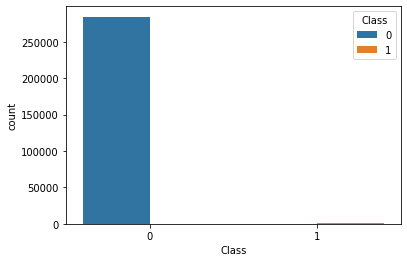

In [31]:
sns.countplot(x=df.Class, hue=df.Class)
# df_class = df["Class"].value_counts()
# df_class.plot.bar()

In [32]:
df.shape

(284807, 31)

In [33]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
# df.isnull().sum()

### Amount column 정규화 

In [34]:
df_amount= df['Amount']
df_time = df['Time']

In [35]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, scale

df_scale_amount = scale(df_amount)
df_scale_amount

df_scale_time = scale(df_time)
df_scale_time

array([-1.99658302, -1.99658302, -1.99656197, ...,  1.6419735 ,
        1.6419735 ,  1.64205773])

In [36]:
df_scale_amount = pd.DataFrame(df_scale_amount, columns=['normalAmount'])
print(df_scale_amount.head(3))

df_scale_time = pd.DataFrame(df_scale_time, columns=['normalTime'])
df_scale_time.head(3)

   normalAmount
0      0.244964
1     -0.342475
2      1.160686


,normalTime
0,-1.996583
1,-1.996583
2,-1.996562


In [37]:
df_remain = df.drop(['Amount','Time'],axis=1)
df_remain.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0


### dataframe concat 

In [38]:
df = pd.concat([df_remain, df_scale_amount,df_scale_time],axis=1)
df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normalAmount,normalTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562


In [39]:
# df.Class.value_counts(normalize=True).plot(kind='bar')
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

*참고   
데이터의 불균형 문제 해결    

1.Under Sampling : 
데이터 분포를 확인한 후 분포가 높은 class를 낮은 분포의 class 크기에 맞춰주는 작업  

2.Over Sampling : 
분포가 작은 클래스의 값을 분포가 큰 클래스로 맞춰주는 샘플링 방법


### Class = 0, 1 각각 492개씩 추출 후 dataframe 형성 

In [40]:
df_class1 = df[df["Class"]==1]
df_class0 = df[df["Class"]==0]
df_class0 = df_class0.sample(492)

In [41]:
df = pd.concat([df_class0, df_class1],axis=0)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normalAmount,normalTime
217244,2.031899,-0.391449,-1.685435,0.220181,0.173559,-0.589888,0.065349,-0.213498,1.268434,-0.145073,...,0.882446,-0.240983,-0.986707,0.514110,-0.253204,-0.000662,-0.060038,0,-0.153325,0.968815
232960,-3.694127,-2.991214,-6.637145,0.898689,-10.364585,6.119996,12.245400,-3.754854,-1.541167,0.692682,...,2.204848,-2.960783,1.238441,-0.897177,0.646572,2.504446,-0.101886,0,11.073301,1.107060
218976,1.963657,-0.287574,-1.020903,0.375900,-0.032726,-0.223409,-0.224912,0.029147,0.510588,0.264598,...,0.153798,0.221293,0.716677,-0.191239,0.210230,-0.056729,-0.058063,0,-0.273268,0.984040
170404,-0.742292,1.568085,-0.334190,-1.828281,2.206252,-0.819036,2.972661,-1.763881,1.366249,2.983417,...,1.133343,-0.427794,0.757852,-0.185618,-0.136261,-0.118160,-0.920665,0,-0.323004,0.533884
141317,-1.180322,0.990147,0.864830,0.208507,0.014551,-1.186983,0.307576,0.276763,-0.580726,-0.630907,...,-0.614987,0.358029,0.348838,-0.040726,0.071935,0.037711,-0.003618,0,-0.305732,-0.222853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1,1.206024,1.565196
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1,-0.350191,1.569513
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1,-0.041818,1.569597
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1,0.626302,1.582548


In [115]:
# DataFrame.sample() 메소드사용 - data의 량이 많아 DataFrame으로 부터 특정 비율의 표본을 무작위로 추출하기 (fraction)
# df = df.sample(frac=0.15)

### Class 를 종속변수, 나머지 독립변수로 지정

In [42]:
x_data = df.drop(['Class'], axis=1) 
y_data = df['Class']

### train , test set 분할 

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import tensorflow as tf 

np.random.seed(3)
tf.random.set_seed(3)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=0)

print(x_train.shape)
print(x_test.shape)

(836, 30)
(148, 30)


### 데이터 간의 상관관계를 그래프로 표현

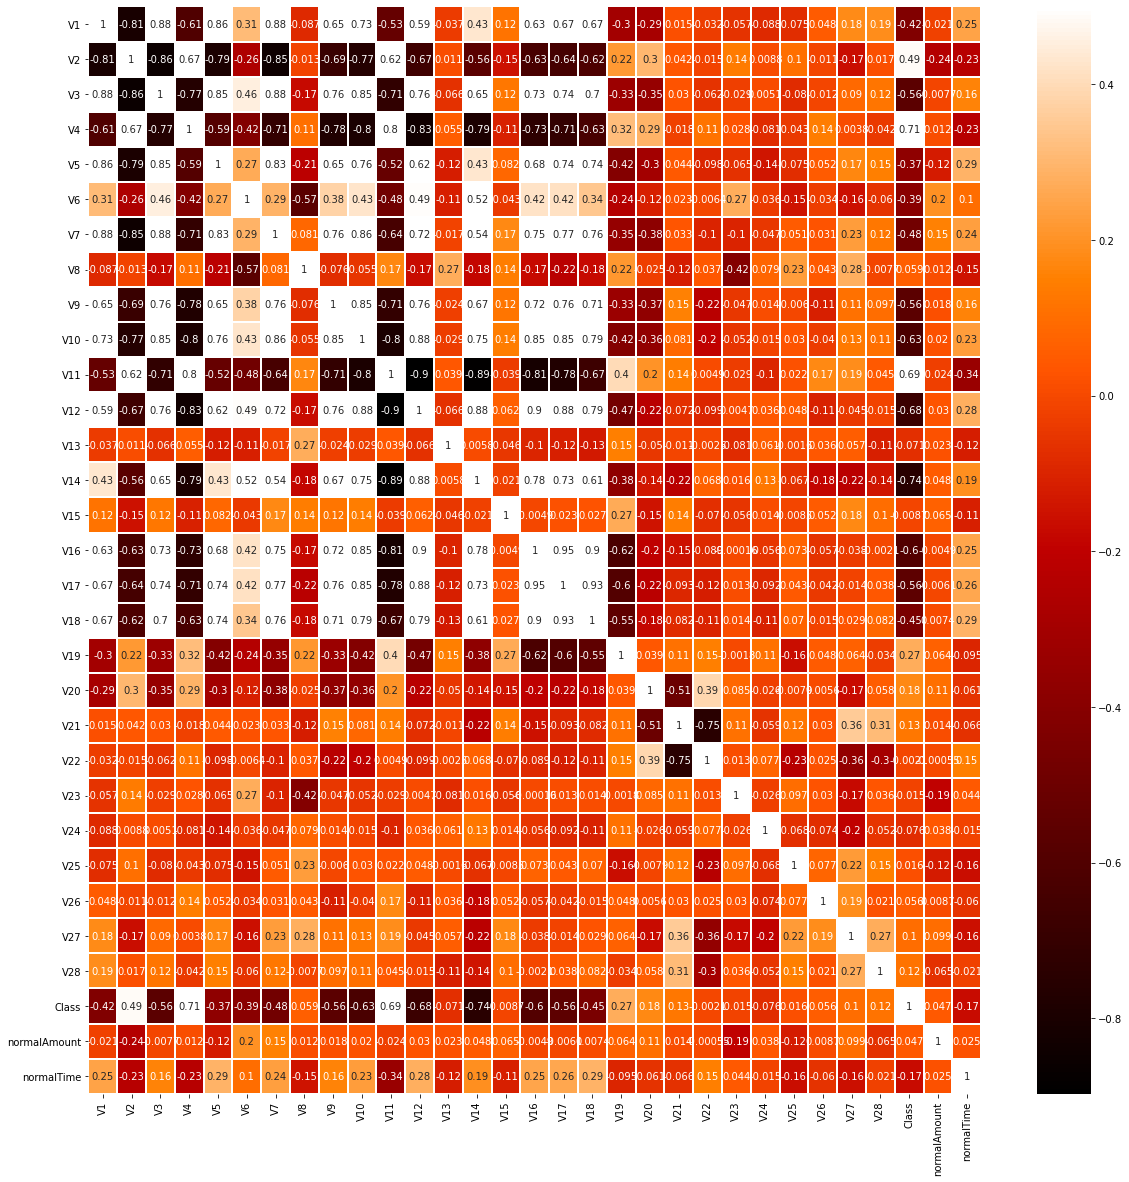

In [44]:
colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(20,20))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [51]:
# grid = sns.FacetGrid(df, col='Class')
# grid.map(plt.hist, 'V4',  bins=2)
# plt.show()

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

# Training the algorithm
lr_model.fit(x_train, y_train)


# Predictions on training and testing data
lr_pred_train = lr_model.predict(x_train)
lr_pred_test = lr_model.predict(x_test)

# Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,74,5
Not Fraud,1,68


<AxesSubplot:>

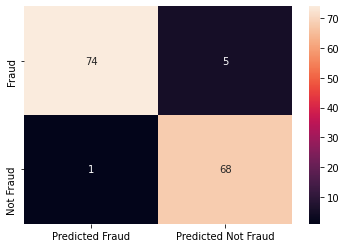

In [49]:
sns.heatmap(conf_matrix, annot=True)

In [50]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)
lr_accuracy

0.9594594594594594

### ANN 

In [27]:
#모델 생성 
model = Sequential()
model.add(Dense(40, input_dim=30, activation='relu')) # dense : 은닉층의 node 갯수 
# model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy']) #오차를 찾는 과정
history = model.fit(x_train,y_train,validation_split=0.33, epochs=30, batch_size=10)
model.evaluate(x_test, y_test)

Epoch 1/30
56/56 [==============================] - 0s 3ms/step - loss: 0.2922 - accuracy: 0.4493 - val_loss: 0.1695 - val_accuracy: 0.6739
Epoch 2/30
56/56 [==============================] - 0s 1ms/step - loss: 0.1618 - accuracy: 0.7174 - val_loss: 0.1058 - val_accuracy: 0.8841
Epoch 3/30
56/56 [==============================] - 0s 971us/step - loss: 0.0961 - accuracy: 0.8792 - val_loss: 0.0773 - val_accuracy: 0.9275
Epoch 4/30
56/56 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 0.9093 - val_loss: 0.0646 - val_accuracy: 0.9420
Epoch 5/30
56/56 [==============================] - 0s 989us/step - loss: 0.0664 - accuracy: 0.9266 - val_loss: 0.0581 - val_accuracy: 0.9420
Epoch 6/30
56/56 [==============================] - 0s 1ms/step - loss: 0.0495 - accuracy: 0.9483 - val_loss: 0.0543 - val_accuracy: 0.9493
Epoch 7/30
56/56 [==============================] - 0s 1ms/step - loss: 0.0369 - accuracy: 0.9702 - val_loss: 0.0518 - val_accuracy: 0.9529
Epoch 8/30
56/56

[0.039370097219944, 0.9527027010917664]

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 41        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


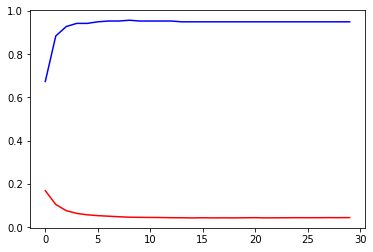

In [28]:
model.summary()

history.history.keys()

y_vloss = history.history['val_loss']
y_acc = history.history['val_accuracy']

# print(len(y_vloss))
x_len = np.arange(len(y_vloss))

plt.plot(x_len, y_vloss,c='red',markersize=3) #빨간색 : 오차  
plt.plot(x_len, y_acc,c='blue',markersize=3) #파란색 : 정확도 
plt.show()

### DNN 

In [21]:
#모델 생성 
model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu')) # dense : 은닉층의 node 갯수 
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy']) #오차를 찾는 과정
history = model.fit(x_train,y_train,validation_split=0.33, epochs=30, batch_size=10)
history

Epoch 1/30
56/56 [==============================] - 1s 3ms/step - loss: 1.0710 - accuracy: 0.5672 - val_loss: 0.5544 - val_accuracy: 0.8623
Epoch 2/30
56/56 [==============================] - 0s 1ms/step - loss: 0.5001 - accuracy: 0.9012 - val_loss: 0.3340 - val_accuracy: 0.9058
Epoch 3/30
56/56 [==============================] - 0s 1ms/step - loss: 0.2895 - accuracy: 0.9214 - val_loss: 0.2443 - val_accuracy: 0.9348
Epoch 4/30
56/56 [==============================] - 0s 1ms/step - loss: 0.2135 - accuracy: 0.9365 - val_loss: 0.2010 - val_accuracy: 0.9457
Epoch 5/30
56/56 [==============================] - 0s 1ms/step - loss: 0.2112 - accuracy: 0.9258 - val_loss: 0.1861 - val_accuracy: 0.9348
Epoch 6/30
56/56 [==============================] - 0s 1ms/step - loss: 0.1501 - accuracy: 0.9360 - val_loss: 0.1763 - val_accuracy: 0.9384
Epoch 7/30
56/56 [==============================] - 0s 1ms/step - loss: 0.1028 - accuracy: 0.9678 - val_loss: 0.1797 - val_accuracy: 0.9312
Epoch 8/30
56/56 [==

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 1,487
Trainable params: 1,487
Non-trainable params: 0
_________________________________________________________________


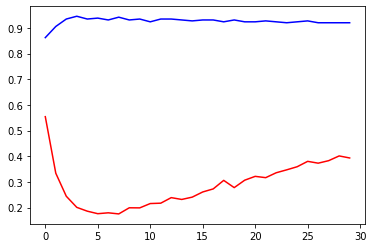

In [22]:
model.summary()

history.history.keys()

y_vloss = history.history['val_loss']
y_acc = history.history['val_accuracy']

# print(len(y_vloss))
x_len = np.arange(len(y_vloss))

plt.plot(x_len, y_vloss,c='red',markersize=3) #빨간색 : 오차  
plt.plot(x_len, y_acc,c='blue',markersize=3) #파란색 : 정확도 
plt.show()